**Data downloaded from kaggle link:-**https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

** Cited and Reference taken from :-** https://www.geeksforgeeks.org/machine-learning/?ref=shm

 **Machine learning Course:- **
https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/

In [ ]:
#Importin Libraries
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings(action='ignore')



In [ ]:
#Reading the dataset
df = pd.read_csv('/content/fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
print('Missing values by attribute:')
df.isna().sum()

Missing values by attribute:


baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
df.shape

(2126, 22)

In [ ]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [ ]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [ ]:
#Information about the data
df.info

<bound method DataFrame.info of       baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerat

In [ ]:
#Checking Null Values
df.isnull().sum().sort_values(ascending=False)

baseline value                                            0
accelerations                                             0
histogram_tendency                                        0
histogram_variance                                        0
histogram_median                                          0
histogram_mean                                            0
histogram_mode                                            0
histogram_number_of_zeroes                                0
histogram_number_of_peaks                                 0
histogram_max                                             0
histogram_min                                             0
histogram_width                                           0
mean_value_of_long_term_variability                       0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_short_term_variability                      0
abnormal_short_term_variability                           0
prolongued_decelerations                

In [ ]:
columns = {'fetal_health', 'fetal_movement', 'uterine_contractions'}

for i in columns:
  print('Unique value of variables{},' ,format(i))
  print(df[i].value_counts())
  print('\n')

Unique value of variables{}, fetal_movement
0.000    1311
0.001     164
0.002     112
0.003      88
0.004      49
         ... 
0.079       1
0.109       1
0.103       1
0.031       1
0.099       1
Name: fetal_movement, Length: 102, dtype: int64


Unique value of variables{}, fetal_health
1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


Unique value of variables{}, uterine_contractions
0.000    332
0.005    290
0.004    244
0.006    231
0.007    216
0.003    212
0.008    160
0.002    160
0.001    118
0.009     82
0.010     49
0.011     16
0.012     11
0.013      2
0.014      2
0.015      1
Name: uterine_contractions, dtype: int64




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

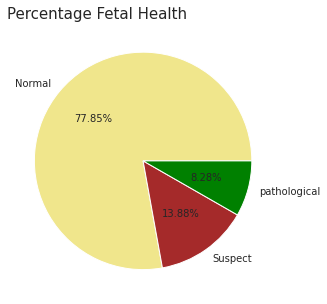

In [ ]:
from numpy.lib.function_base import place
plt.figure(figsize=(5,5))
plt.pie(df['fetal_health'].value_counts(), colors=['khaki', 'brown','green'],
        labels=['Normal', 'Suspect', 'pathological'], autopct='%.2f%%')
plt.title('Percentage Fetal Health', loc='left', fontsize=15)
plt.show()

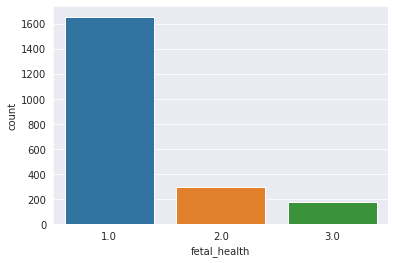

In [ ]:
sns.countplot(x="fetal_health",data= df)
plt.show()

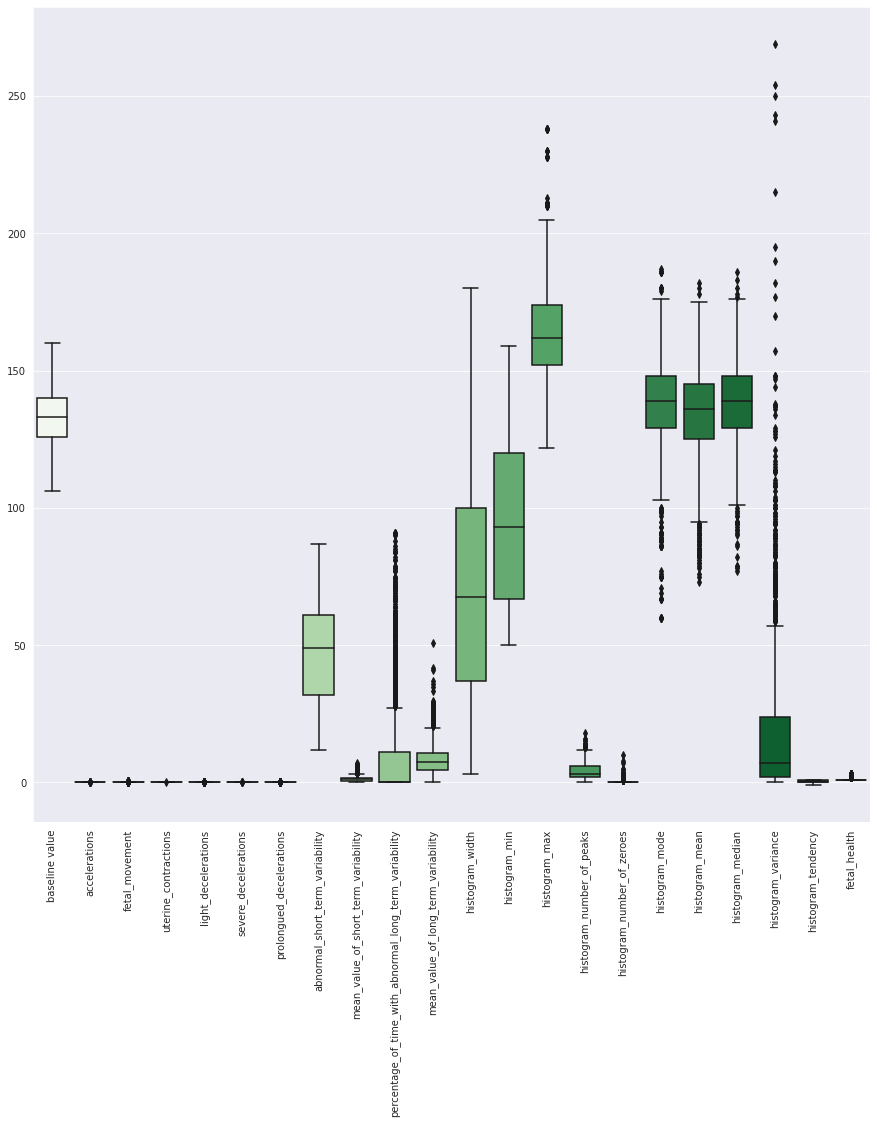

In [ ]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,palette="Greens")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['fetal_health']=df['fetal_health'].replace([1,2,3], ['Normal', 'Suspect', 'pathological'])

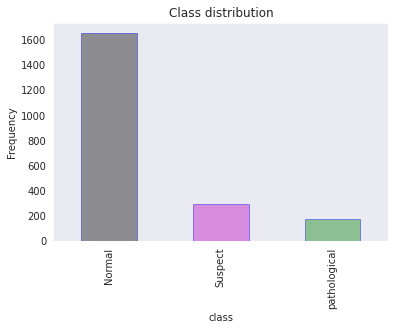

In [ ]:
df['fetal_health'].value_counts().plot.bar(color=['k','m','g'], edgecolor='b',alpha=0.4)
plt.xlabel('class')
plt.ylabel('Frequency')
plt.title('Class distribution')
plt.grid()
plt.show()

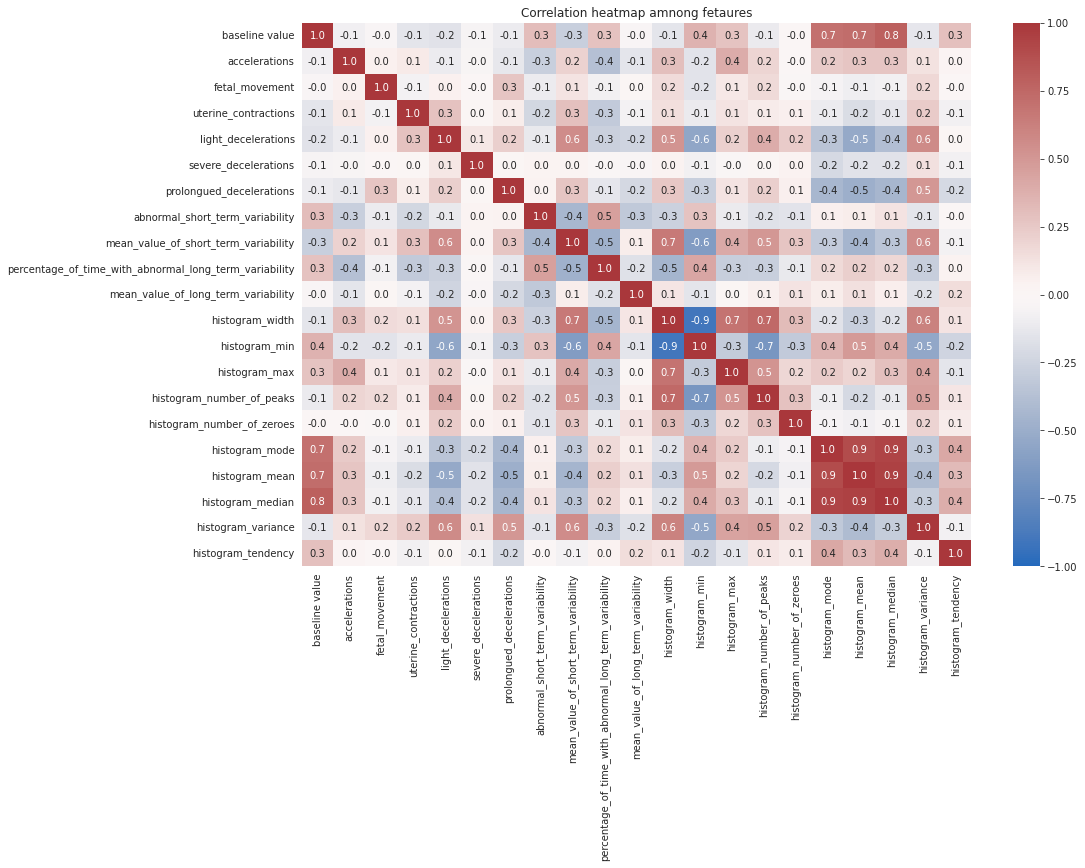

In [ ]:
#correlation matrix
X = df.corr()
plt.figure(figsize=(15,10))

cmap = sns.diverging_palette(275, 15, s=90, l=65, n=9, as_cmap=True)
sns.heatmap(X,annot=True, cmap='vlag', center=0,fmt='.1f',vmin=-1,vmax=1)
plt.title('Correlation heatmap amnong fetaures')
plt.show()
1

In [ ]:
#assigning values to features as X and target as y
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
X=df.drop(["fetal_health"],axis=1)
y=df["fetal_health"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,4.161509e-16,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-1.803982e-16,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.958452e-15,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-2.625683e-15,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.127706e-15,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,7.254767e-16,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,4.324961e-15,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,2.687304e-16,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,-2.481552e-16,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,2.291362e-15,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


In [ ]:
#training test split data set into 70:30 ratio
from sklearn.model_selection import train_test_split
X = np.array(X)
y=np.array(df['fetal_health'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,shuffle=True,random_state=936)
print('Train set feature shape:', X_train.shape,y_train.shape)
print('Test set feature shape:', X_test.shape,y_test.shape)

Train set feature shape: (1488, 21) (1488,)
Test set feature shape: (638, 21) (638,)


Data Modeling

In [ ]:
#calculating accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
#model 1 Decision tree
dt = DecisionTreeClassifier().fit(X_train,y_train)


In [ ]:
DecisionTreeClassifier(max_depth =8).fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [ ]:
y_test_pred=dt.predict(X_test)
print(classification_report(y_test,y_test_pred))
accuracy1=accuracy_score(y_test,y_test_pred)*100
print('accuracy = %.2f'%accuracy1)

              precision    recall  f1-score   support

      Normal       0.96      0.95      0.95       506
     Suspect       0.71      0.73      0.72        89
pathological       0.78      0.81      0.80        43

    accuracy                           0.91       638
   macro avg       0.82      0.83      0.82       638
weighted avg       0.91      0.91      0.91       638

accuracy = 91.07


In [ ]:
#prediction results and classification
confusion_matrix_df=pd.DataFrame((confusion_matrix(y_test,y_test_pred)),
                                 ('Normal','Suspect','Pathological'),
                                 (1,2,3))

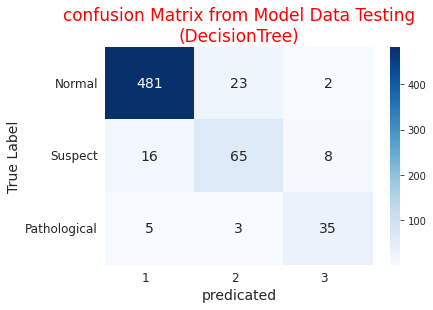

In [ ]:
from seaborn.matrix import heatmap
#plot confusion matrix
plt.figure
heatmap=sns.heatmap(confusion_matrix_df,annot=True,annot_kws={'size':14}, fmt='d',cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha='right',fontsize='12')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=0,ha='right',fontsize='12')

plt.title('confusion Matrix from Model Data Testing\n(DecisionTree)',fontsize='17',color='red')
plt.ylabel('True Label',fontsize=14)
plt.xlabel('predicated',fontsize=14)
plt.show()

**logistic regression**

In [ ]:
#model 2
#logistic regression algorithm
lr=LogisticRegression().fit(X_train,y_train)
lr

LogisticRegression()

In [ ]:
#prediction and classification results
y_test_pred2=lr.predict(X_test)
print(classification_report(y_test,y_test_pred2))
accuracy2=accuracy_score(y_test,y_test_pred2)*100
print('accuracy= %.2f'%accuracy2)

              precision    recall  f1-score   support

      Normal       0.91      0.95      0.93       506
     Suspect       0.61      0.44      0.51        89
pathological       0.70      0.72      0.71        43

    accuracy                           0.86       638
   macro avg       0.74      0.70      0.72       638
weighted avg       0.85      0.86      0.86       638

accuracy= 86.36


In [ ]:
#prediction results and classification
confusion_matrix_df=pd.DataFrame((confusion_matrix(y_test,y_test_pred2)),
                                 ('Normal','Suspect','Pathological'),
                                 (1,2,3))

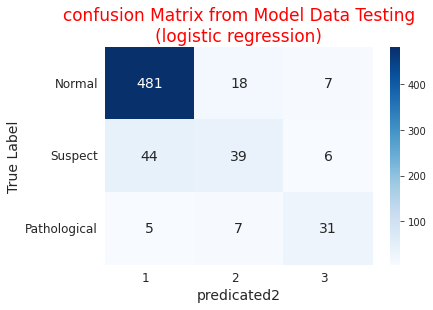

In [ ]:
#plot confusion matrix
plt.figure
heatmap=sns.heatmap(confusion_matrix_df,annot=True,annot_kws={'size':14}, fmt='d',cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha='right',fontsize='12')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=0,ha='right',fontsize='12')

plt.title('confusion Matrix from Model Data Testing\n(logistic regression)',fontsize='17',color='red')
plt.ylabel('True Label',fontsize=14)
plt.xlabel('predicated2',fontsize=14)
plt.show()

**Random Forest**

In [ ]:
#model 3
rfc = RandomForestClassifier().fit(X_train,y_train)
rfc

RandomForestClassifier()

In [ ]:
from pandas.core.common import random_state
scaler=StandardScaler()
estimator=ExtraTreesClassifier(n_estimators=150,random_state=104)
rfetree=RFECV(estimator,step=1,cv=4,n_jobs=-1)
rfmodel=RandomForestClassifier(max_depth =10,random_state=178,n_jobs=-1,ccp_alpha=1e-3)
rfpipe=Pipeline([('Standardize',scaler),('Selector',rfetree),('classifier',rfmodel)])
rfpipe.fit(X_train,y_train)

Pipeline(steps=[('Standardize', StandardScaler()),
                ('Selector',
                 RFECV(cv=4,
                       estimator=ExtraTreesClassifier(n_estimators=150,
                                                      random_state=104),
                       n_jobs=-1)),
                ('classifier',
                 RandomForestClassifier(ccp_alpha=0.001, max_depth=10,
                                        n_jobs=-1, random_state=178))])

In [ ]:
#prediction and classification results
y_test_pred3=rfc.predict(X_test)
print(classification_report(y_test,y_test_pred3))
accuracy3=accuracy_score(y_test,y_test_pred3)*100
print('accuracy= %.2f'%accuracy3)

              precision    recall  f1-score   support

      Normal       0.97      0.98      0.97       506
     Suspect       0.85      0.79      0.82        89
pathological       0.80      0.86      0.83        43

    accuracy                           0.94       638
   macro avg       0.88      0.87      0.87       638
weighted avg       0.94      0.94      0.94       638

accuracy= 94.20


In [ ]:
#prediction results and classification
confusion_matrix_df=pd.DataFrame((confusion_matrix(y_test,y_test_pred3)),
                                 ('Normal','Suspect','Pathological'),
                                 (1,2,3))

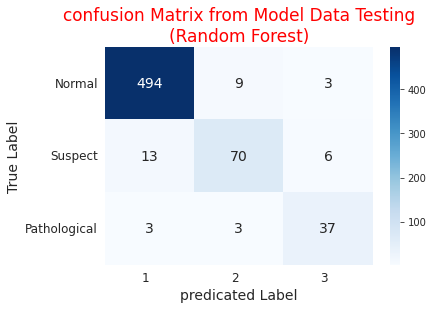

In [ ]:
#plot confusion matrix
plt.figure
heatmap=sns.heatmap(confusion_matrix_df,annot=True,annot_kws={'size':14}, fmt='d',cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha='right',fontsize='12')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=0,ha='right',fontsize='12')

plt.title('confusion Matrix from Model Data Testing\n(Random Forest)',fontsize='17',color='red')
plt.ylabel('True Label',fontsize=14)
plt.xlabel('predicated Label',fontsize=14)
plt.show()

**Knearest Neighbour**

In [ ]:
X = df.drop(['fetal_health'], axis  = 1)
y = df['fetal_health']

In [ ]:
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
#prediction and classification results
y_test_pred4=rfc.predict(X_test)
print(classification_report(y_test,y_test_pred4))
KNeighborsClassifierScore = knn.score(X_test,y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)


              precision    recall  f1-score   support

      Normal       0.97      0.98      0.97       506
     Suspect       0.85      0.79      0.82        89
pathological       0.80      0.86      0.83        43

    accuracy                           0.94       638
   macro avg       0.88      0.87      0.87       638
weighted avg       0.94      0.94      0.94       638

Accuracy obtained by K Neighbors Classifier model: 89.81191222570533


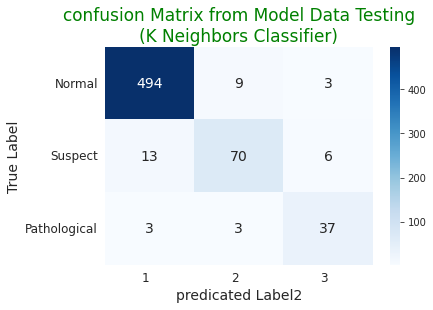

In [ ]:
#plot confusion matrix
plt.figure
heatmap=sns.heatmap(confusion_matrix_df,annot=True,annot_kws={'size':14}, fmt='d',cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha='right',fontsize='12')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=0,ha='right',fontsize='12')

plt.title('confusion Matrix from Model Data Testing\n(K Neighbors Classifier)',fontsize='17',color='green')
plt.ylabel('True Label',fontsize=14)
plt.xlabel('predicated Label2',fontsize=14)
plt.show()

**GradientBoostingClassifier**

In [ ]:
#model 4
# GradientBoostingClassifier algorithm
gbc=GradientBoostingClassifier().fit(X_train,y_train)
gbc

GradientBoostingClassifier()

In [ ]:
#prediction and classification results
y_test_pred4=gbc.predict(X_test)
print(classification_report(y_test,y_test_pred3))
accuracy4=accuracy_score(y_test,y_test_pred4)*100
print('accuracy= %.2f'%accuracy4)

              precision    recall  f1-score   support

      Normal       0.97      0.98      0.97       506
     Suspect       0.85      0.79      0.82        89
pathological       0.80      0.86      0.83        43

    accuracy                           0.94       638
   macro avg       0.88      0.87      0.87       638
weighted avg       0.94      0.94      0.94       638

accuracy= 95.45


In [ ]:
#prediction results and classification
confusion_matrix_df=pd.DataFrame((confusion_matrix(y_test,y_test_pred4)),
                                 ('Normal','Suspect','Pathological'),
                                 (1,2,3))

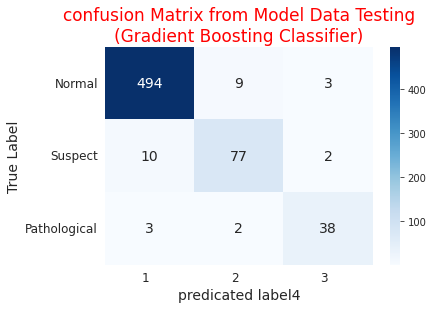

In [ ]:
#plot confusion matrix
plt.figure
heatmap=sns.heatmap(confusion_matrix_df,annot=True,annot_kws={'size':14}, fmt='d',cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha='right',fontsize='12')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=0,ha='right',fontsize='12')

plt.title('confusion Matrix from Model Data Testing\n(Gradient Boosting Classifier)',fontsize='17',color='red')
plt.ylabel('True Label',fontsize=14)
plt.xlabel('predicated label4',fontsize=14)
plt.show()

So Random Forest does best amongst the models to be the most accurate